# Interacting with raster data

In [1]:
from IPython.display import Image, IFrame

## Intro

Use an **image** and control **pixel** colors to encode **values**

The value assigned for each cell represents the attribute of that cell

- Continuous variables, surfaces (temperature, density, elevation...)
- Satellite images (land cover, land use...)

In [2]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/b/b8/Raster_vector_tikz.png',
      width=700)

In [3]:
Image(url='../figs/planet.png', width=700)

In [4]:
IFrame('https://earth.nullschool.net/', 700, 500)

In [5]:
Image(url='../figs/strava.png', width=700)

In [6]:
IFrame('http://luminocity3d.org/WorldPopDen/#6/-21.606/-44.247', 700, 500)

## Data 

In [7]:
IFrame('https://ghsl.jrc.ec.europa.eu/', 700, 400)

## Access 

In [8]:
IFrame('https://rasterio.readthedocs.io/en/stable/',
       700, 400)

In [9]:
%matplotlib inline

import rasterio
from rasterio.mask import mask as riomask
from rasterio.plot import show as rioshow
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

bh = gpd.read_file('../data/bh.gpkg').to_crs(epsg=3857)

* Open

In [10]:
src = rasterio.open('../data/bh_pop_wm.tif')

* Inspect

In [11]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 3.4028234663852886e+38,
 'width': 1046,
 'height': 1383,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:3857'),
 'transform': Affine(326.5981069789678, 0.0, -5039886.7533,
        0.0, -244.2628198843094, -2045445.2208)}

In [12]:
src.bounds

BoundingBox(left=-5039886.7533, bottom=-2383260.7007, right=-4698265.1334, top=-2045445.2208)

In [13]:
src.crs

CRS.from_dict(init='epsg:3857')

In [14]:
src.count

1

* Read

In [15]:
ghsl = src.read()

In [16]:
ghsl.shape

(1, 1383, 1046)

In [17]:
ghsl = src.read(1, masked=True)

In [18]:
ghsl.shape

(1383, 1046)

In [19]:
ghsl

masked_array(
  data=[[--, --, --, ..., -3.4028234663852886e+38,
         -3.4028234663852886e+38, -3.4028234663852886e+38],
        [--, --, --, ..., -3.4028234663852886e+38,
         -3.4028234663852886e+38, -3.4028234663852886e+38],
        [--, --, --, ..., -3.4028234663852886e+38,
         -3.4028234663852886e+38, -3.4028234663852886e+38],
        ...,
        [-3.4028234663852886e+38, -3.4028234663852886e+38,
         -3.4028234663852886e+38, ..., --, --, --],
        [-3.4028234663852886e+38, -3.4028234663852886e+38,
         -3.4028234663852886e+38, ..., --, --, --],
        [-3.4028234663852886e+38, -3.4028234663852886e+38,
         -3.4028234663852886e+38, ..., --, --, --]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        

* Read parts

In [20]:
src.shape

(1383, 1046)

In [21]:
# Like iloc!!!
windowed = src.read(1, window=((500, 800), (200, 250)))

In [22]:
windowed.shape

(300, 50)

* Read shapes

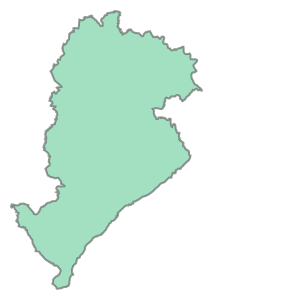

In [23]:
bhm = bh.query("NM_MUNICIP == 'BELO HORIZONTE'").iloc[0, -1]
bhm

In [24]:
ghsl_bhm, transform = riomask(src, 
                              [bhm], 
                              crop=True,
                              filled=False,
                              indexes=1)

In [25]:
ghsl_bhm

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=3.4028235e+38,
  dtype=float32)

In [26]:
ghsl_bhm.shape

(138, 72)

* Access as an `ndarray`

* Or transform into a `DataFrame`

## Visualise

* Single plot with `rioshow`

/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:412: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min


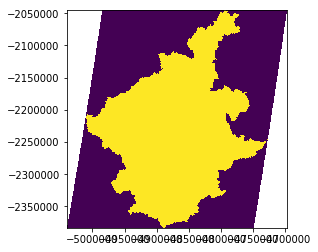

In [27]:
rioshow(src)

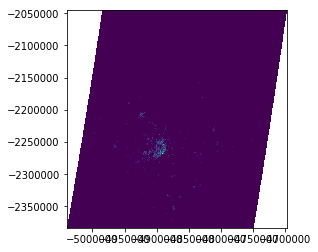

In [28]:
rioshow(src, vmin=0)

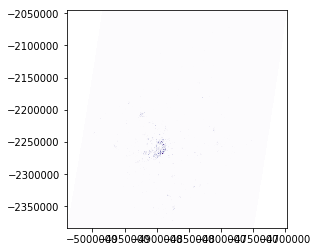

In [29]:
rioshow(src, vmin=0, cmap='Purples')

* Combine with other type of data

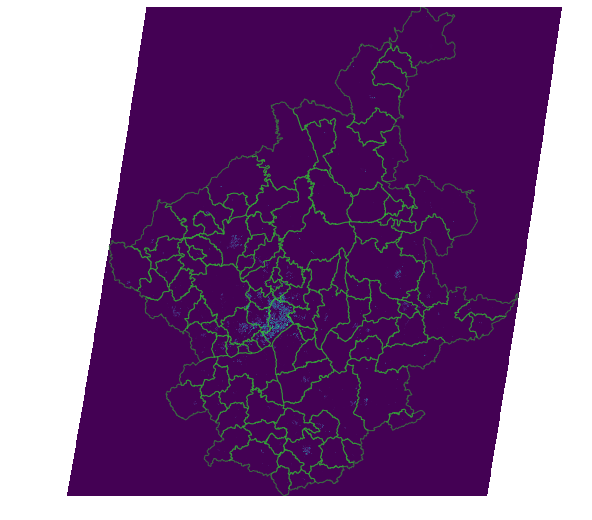

In [30]:
f, ax = plt.subplots(1, figsize=(9, 9))
rioshow(src, vmin=0, ax=ax)
# Add BH boundaries
bh.plot(facecolor='none', edgecolor='#32CD32', 
        alpha=0.5, ax=ax)
# Remove axis
ax.set_axis_off()
plt.show()

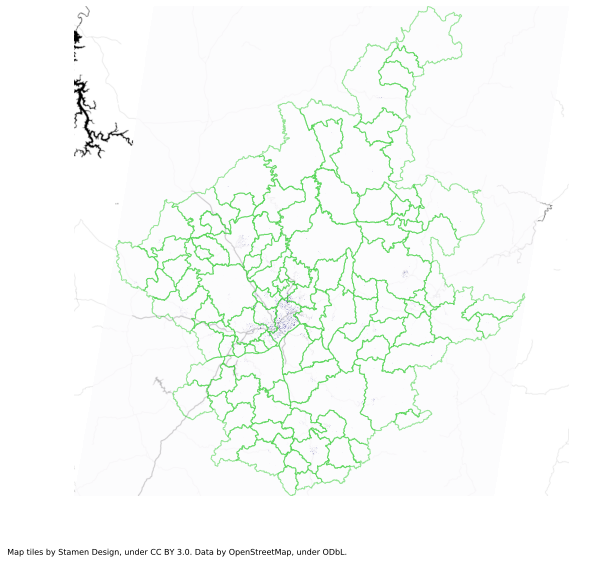

In [31]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Add BH boundaries
bh.plot(facecolor='none', edgecolor='#32CD32', 
        alpha=0.5, ax=ax)
# Add basemap
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND)
# Add population grid
rioshow(src, vmin=0, cmap='Purples',
        alpha=0.75, ax=ax)
# Remove axis
ax.set_axis_off()
plt.show()

**PRO-tip**

To drop `N/A` values from the plot, we can create extend the original mask:

In [32]:
extra_mask = np.where(ghsl.data<0)
ghsl.mask[extra_mask] =True

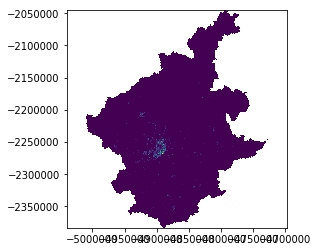

In [33]:
rioshow(ghsl, transform=src.transform)

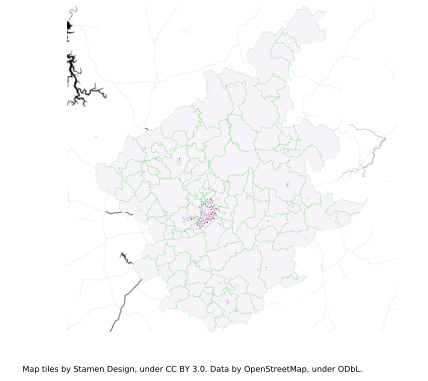

In [34]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Add BH boundaries
bh.plot(facecolor='none', edgecolor='#32CD32', 
        linewidth=0.1, ax=ax)
# Add basemap
ctx.add_basemap(ax, url=ctx.sources.ST_TONER_BACKGROUND)
# Add population grid
rioshow(ghsl, transform=src.transform, 
        cmap='PuRd', ax=ax)
# Remove axis
ax.set_axis_off()

plt.show()

## Analyse

* *What's the total population within the metro area?*

In [35]:
ghsl.sum()

6014882.5

[WikiPedia](https://en.wikipedia.org/wiki/Urban_area#Brazil) says 5,142,260, so not too bad!

* Centre/Periphery population

In [36]:
central = ['3106200', '3110004', '3117876', '3118601', '3129806', '3134608',
           '3137601', '3141108', '3144805', '3149309', '3153905', '3154606',
           '3154804', '3156700', '3157807', '3162955', '3168309', '3171204']
centre = pd.Series('Periphery', index=bh.index)
centre[bh['CD_GEOCMU'].isin(central)] = 'Centre'
centre.head()

0    Periphery
1    Periphery
2    Periphery
3    Periphery
4    Periphery
dtype: object

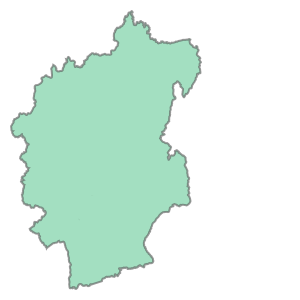

In [37]:
centre_pol = bh.assign(centre=centre)\
               .query("centre == 'Centre'")\
               .unary_union
centre_pol

In [38]:
ghsl_centre, transform = riomask(src, 
                                 [centre_pol], 
                                 crop=True,
                                 filled=False,
                                 indexes=1)

In [39]:
# Centre
ghsl_centre.sum()

4029287.8

In [40]:
# Periphery
ghsl.sum() - ghsl_centre.sum()

1985594.8

**EXERCISE** - *What's the total population within the municipality of Belo Horizonte?*

---

### More advanced example

* Population by municipio

In [41]:
def get_pop(row, src):
    poly_raster, transform = riomask(src, 
                                     [row['geometry']], 
                                     crop=True,
                                     filled=False,
                                     indexes=1)
    mask = np.where(poly_raster < 0)
    poly_raster.mask[mask] = True
    return poly_raster.sum()


In [42]:
bh.set_index('NM_MUNICIP')\
  .apply(get_pop, axis=1, src=src)\
  .sort_values(ascending=False)\
  .head()

NM_MUNICIP
BELO HORIZONTE         2.242502e+06
CONTAGEM               5.800818e+05
BETIM                  3.822454e+05
RIBEIRÃO DAS NEVES    2.995514e+05
SETE LAGOAS            2.122610e+05
dtype: float64

---


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science with Python - UFMG'19</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/darribas/gds_ufmg19" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.
